In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

Data Loading

In [2]:
hr = pd.read_csv('turnover.csv')

#Explore analysis
hr.info()
hr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
# Missing data checking
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
# List values of categorical columns
categories = {'sales': hr['sales'].unique().tolist(), 'salary': hr['salary'].unique().tolist()}
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1]:
        print('\n')

salary:
['low', 'medium', 'high']


sales:
['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']


In [5]:
# Rename sales column
hr = hr.rename(columns={'sales': 'Department'})
hr = hr.rename(columns={'average_montly_hours': 'average_monthly_hours'})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Target proportion
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
# Get the mean of each variable for employees who left
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left company have
Lower satisfaction_level: 0.44 vs 0.67
Higher average_monthly_hours: 207 vs 199
Lower work_accident: 0.05 vs 0.18
Lower promotion_last_5years: 0.01 vs 0.03

Explantory Visualization

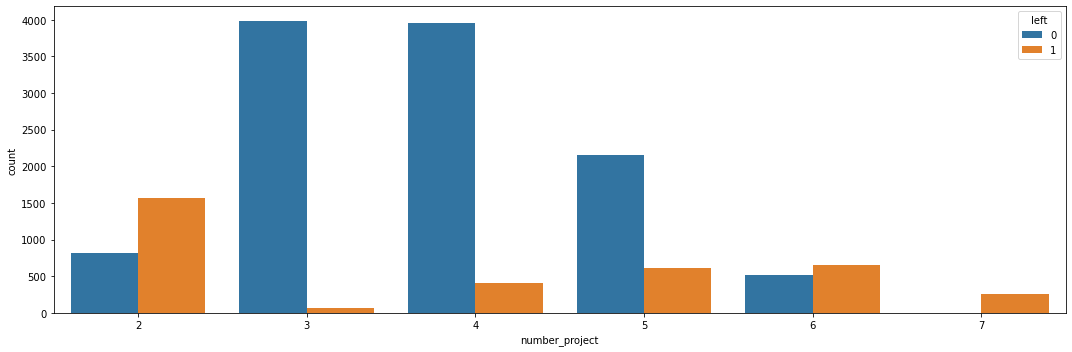

In [8]:
# Turnover by number of projects
plt.figure(figsize=(15,5))
sns.countplot(x='number_project', hue='left', data=hr)
plt.tight_layout()

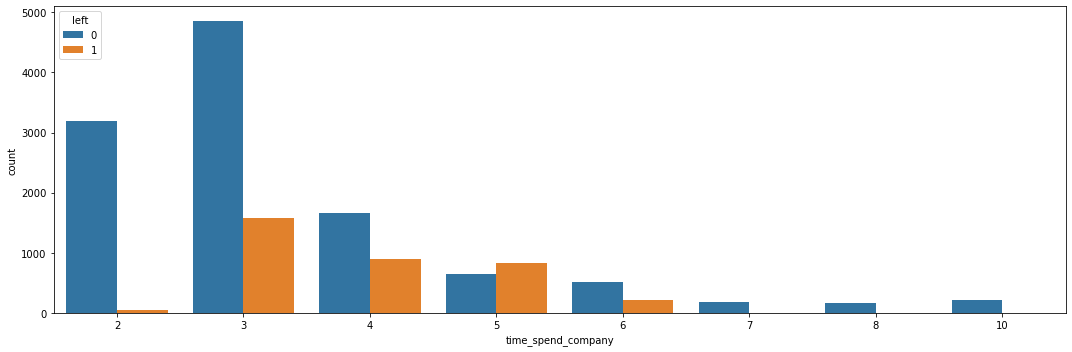

In [9]:
# Turnover by time spend in company
plt.figure(figsize=(15,5))
sns.countplot(x='time_spend_company', hue='left', data=hr)
plt.tight_layout()

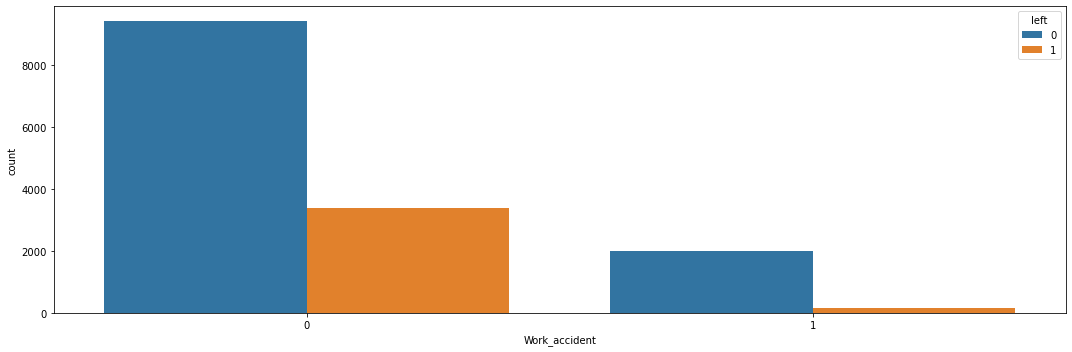

In [10]:
# Turnover by work accident
plt.figure(figsize=(15,5))
sns.countplot(x='Work_accident', hue='left', data=hr)
plt.tight_layout()

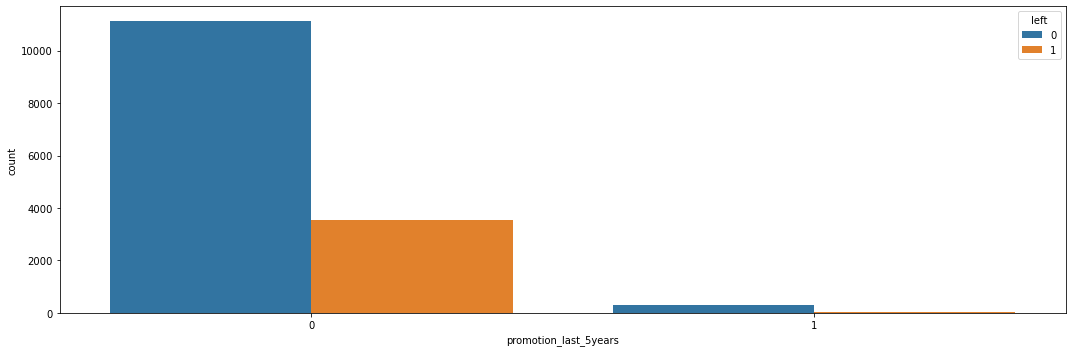

In [11]:
# Turnover by promotion in last 5 years
plt.figure(figsize=(15,5))
sns.countplot(x='promotion_last_5years', hue='left', data=hr)
plt.tight_layout()

In [12]:
print('Turnover Rate if Promotion:', round(len(hr[(hr['promotion_last_5years']==1)&(hr['left']==1)])/len(hr[(hr['promotion_last_5years']==1)])*100,2),'%')
print('Turnover Rate if No Promotion:', round(len(hr[(hr['promotion_last_5years']==0)&(hr['left']==1)])/len(hr[(hr['promotion_last_5years']==0)])*100,2),'%')

Turnover Rate if Promotion: 5.96 %
Turnover Rate if No Promotion: 24.2 %


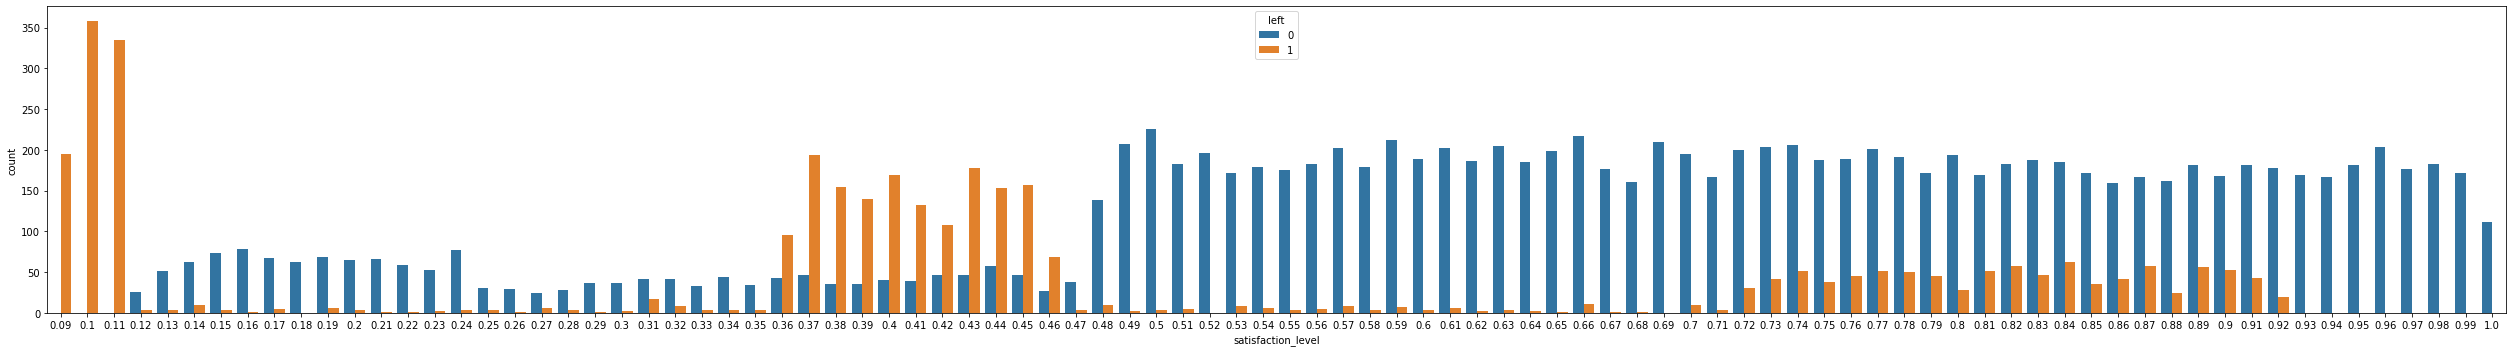

In [13]:
# Turnover by satisfaction level
plt.figure(figsize=(35,5))
sns.countplot(x='satisfaction_level', hue='left', data=hr)
plt.tight_layout()

Employees who left company have satisfaction level at 0.09-0.12, 0.36-0.46, 0.72-0.92 regions. In most of cases, lower satisfaction level leads to high turnover count

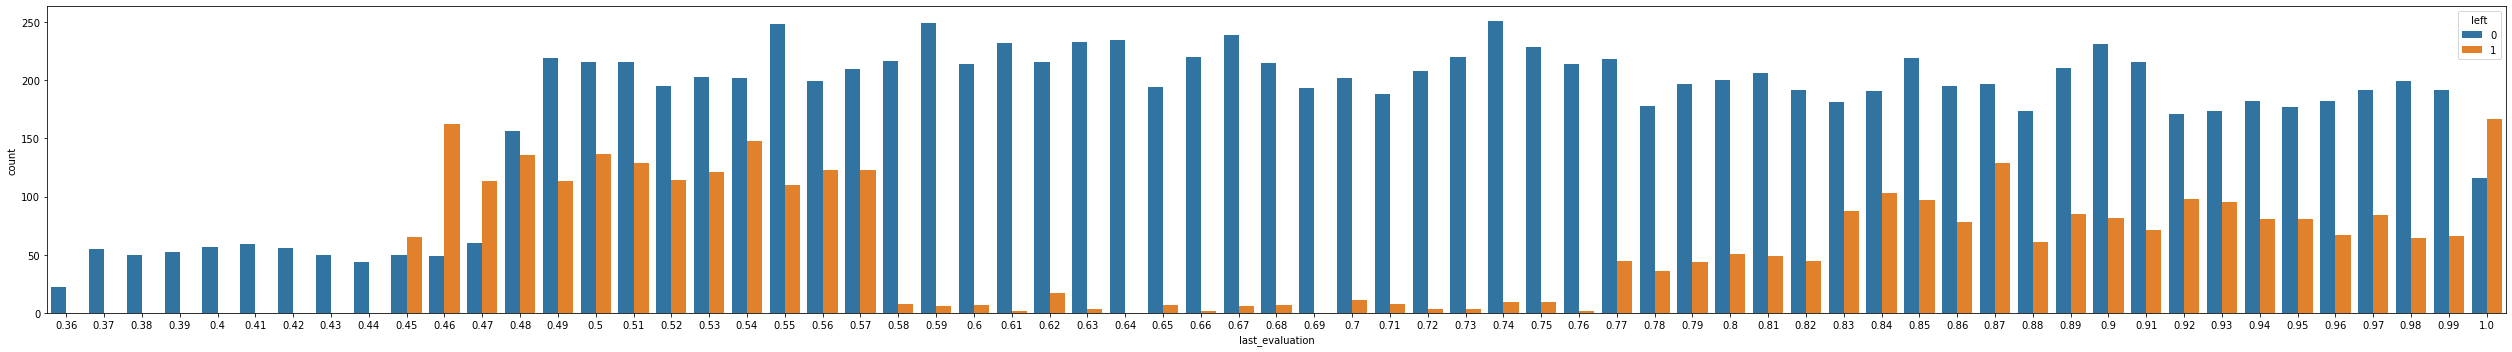

In [14]:
# Turnover by last evaluaction
plt.figure(figsize=(35,5))
sns.countplot(x='last_evaluation', hue='left', data=hr)
plt.tight_layout()

There are two regions in last evaluations with high turnover count: 0.45-0.57, and > 0.77, indicating employees with medium and high evaluations tend to leave.

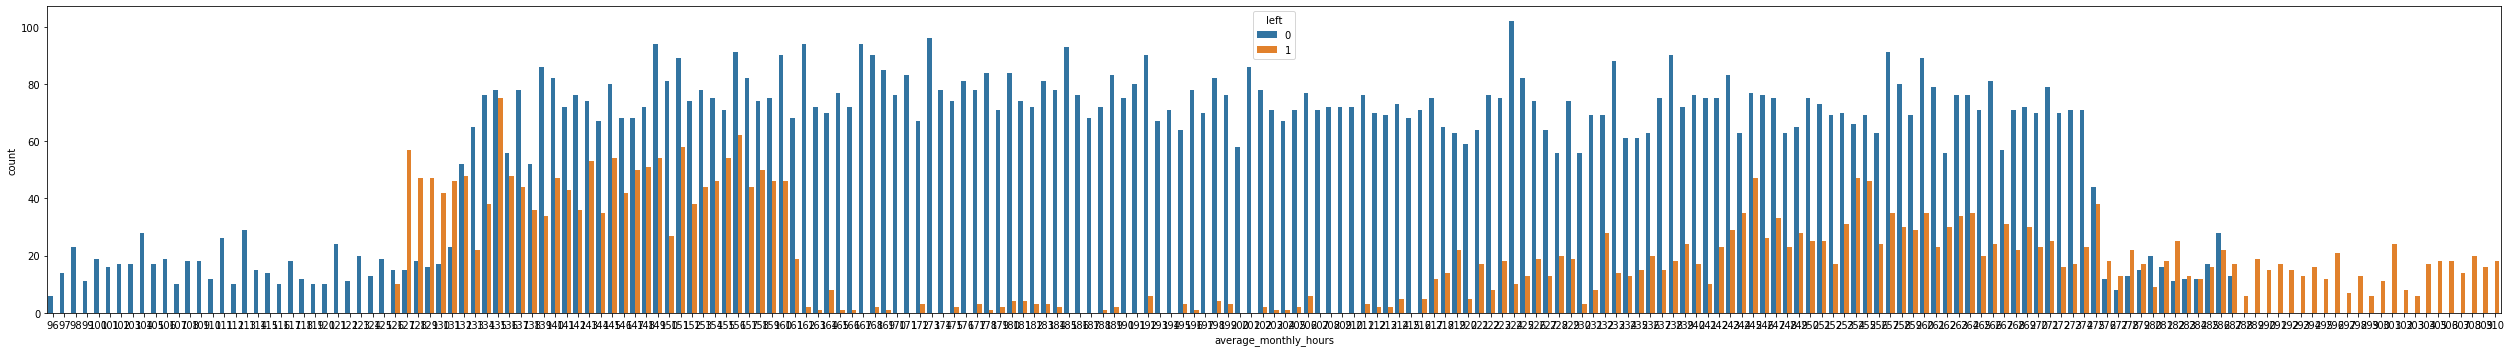

In [15]:
# Turnover by average monthly hours
plt.figure(figsize=(35,5))
sns.countplot(x='average_monthly_hours', hue='left', data=hr)
plt.tight_layout()

There are two high turnover regions in average monthly hours: 126-161 and > 275. For average monthly hours more than 288, turnover rate is 100%.

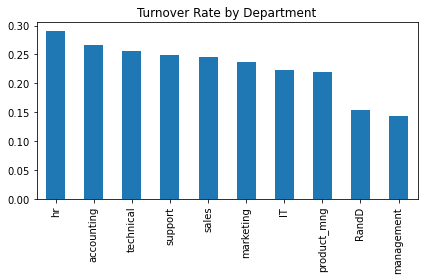

In [16]:
# Turnover by department
hr.groupby('Department')['left'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Turnover Rate by Department')
plt.xlabel('')
plt.tight_layout()

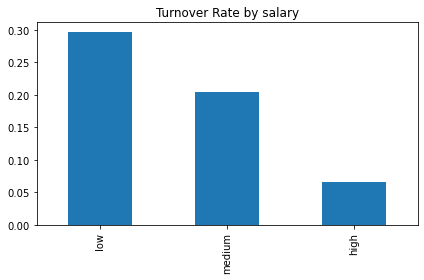

In [17]:
# Turnover by salary
hr.groupby('salary')['left'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Turnover Rate by salary')
plt.xlabel('')
plt.tight_layout()